# Chapter 27

# Deep Learning II

1. Deep learning
2. Introduction to Tensorflow
3. Introduction to Keras

## Deep learning

## Introduction to Tensorflow

## Introduction to Keras

In [4]:
!pip install -q tensorflow
!pip install -q scikit-learn


In [5]:

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.7.0


In [6]:

# datasetFileName = "../gokPrj/alldataset.npz"
datasetFileName = "master_dataset1.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


(434,)
(434,)
(434,)


In [7]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


object
object
<U10
(434,)
(434,)
(434,)


In [8]:
dataLabels[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0], dtype=object)

In [9]:
dataLabelNames[0:10]

array(['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng',
       'mahmuda', 'numan', 'saseendran', 'afiq'], dtype='<U10')

In [10]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['afiq',
 'azureen',
 'gavin',
 'goke',
 'inamul',
 'jincheng',
 'mahmuda',
 'numan',
 'saseendran']

In [11]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [12]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

In [13]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.3, random_state=42)

print(trainImages.shape)
print(testImages.shape)


(303, 200, 200, 3)
(131, 200, 200, 3)


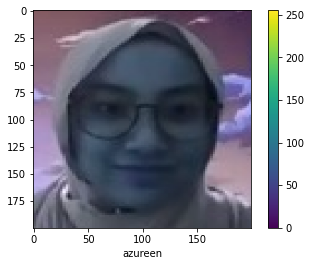

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [16]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0


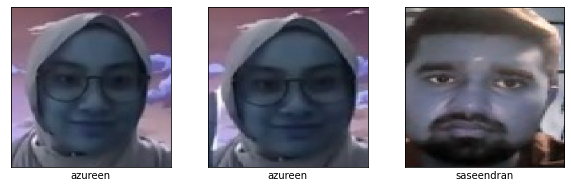

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [18]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape) #,
    # tf.keras.layers.Softmax()
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
testImages.dtype

dtype('float64')

In [21]:
fitResult = model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 84ms/step - loss: 59.2480 - accuracy: 0.1980
Epoch 2/10
10/10 [==============================] - 1s 82ms/step - loss: 19.7340 - accuracy: 0.3729
Epoch 3/10
10/10 [==============================] - 1s 81ms/step - loss: 7.9592 - accuracy: 0.5479
Epoch 4/10
10/10 [==============================] - 1s 84ms/step - loss: 3.4968 - accuracy: 0.4917
Epoch 5/10
10/10 [==============================] - 1s 77ms/step - loss: 1.5955 - accuracy: 0.6436
Epoch 6/10
10/10 [==============================] - 1s 77ms/step - loss: 0.9095 - accuracy: 0.7360
Epoch 7/10
10/10 [==============================] - 1s 75ms/step - loss: 0.7177 - accuracy: 0.7492
Epoch 8/10
10/10 [==============================] - 1s 78ms/step - loss: 0.4997 - accuracy: 0.8185
Epoch 9/10
10/10 [==============================] - 1s 76ms/step - loss: 0.5014 - accuracy: 0.8416
Epoch 10/10
10/10 [==============================] - 1s 76ms/step - loss: 0.3993 - accuracy: 0.8482


In [22]:
fitResult.history

{'loss': [59.24802780151367,
  19.7340087890625,
  7.959227561950684,
  3.496819257736206,
  1.5954535007476807,
  0.9095016717910767,
  0.7177064418792725,
  0.4997352659702301,
  0.5014454126358032,
  0.39927470684051514],
 'accuracy': [0.19801980257034302,
  0.37293729186058044,
  0.5478547811508179,
  0.4917491674423218,
  0.6435643434524536,
  0.735973596572876,
  0.7491748929023743,
  0.8184818625450134,
  0.8415841460227966,
  0.8481848239898682]}

In [23]:
trainLoss, trainAcc = fitResult.history['loss'][-1], fitResult.history['accuracy'][-1]
trainLoss, trainAcc

(0.39927470684051514, 0.8481848239898682)

In [24]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)
testLoss, testAcc

5/5 - 0s - loss: 1.0595 - accuracy: 0.7786 - 256ms/epoch - 51ms/step

Test accuracy: 0.7786259651184082


(1.0594618320465088, 0.7786259651184082)

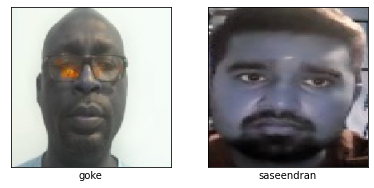

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])
plt.show()

In [26]:
predictions = model.predict(testImages)
predictions[0]

array([ -2.930694 ,  -1.9945862,   5.4609413,  13.503605 , -11.644752 ,
        -4.7758408, -10.338159 ,   3.7292683,   3.4038663], dtype=float32)

In [27]:
i = 1
predictedLabel = np.argmax(predictions[i])
predictedLabel, testLabels[i], predictedLabel == testLabels[i]

(8, 8, True)

### Using Softmax

Softmax layer assist in turning the prediction values to fractions. Showing the highest value as the most likely.

In [28]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probabilityModel.predict(testImages)
predictions[0]


array([7.28605087e-08, 1.85797106e-07, 3.21316737e-04, 9.99580443e-01,
       1.19680914e-11, 1.15121219e-08, 4.42050459e-11, 5.68692158e-05,
       4.10730354e-05], dtype=float32)

In [29]:
np.argmax(predictions[0]), testLabels[0]

(3, 3)

### Saving Model

In [28]:
import os

exportPath = ""

# if testAcc > 0.95:
modelDir = 'tf_model'
version = f"4_{(testAcc*100):.0f}"

# for SavedModel format
exportPath = os.path.join(modelDir, version)

# save the model
model.save(exportPath, save_format="tf")

print('\nexport path = {}'.format(exportPath))

!dir {exportPath}

INFO:tensorflow:Assets written to: tf_model\4_85\assets

export path = tf_model\4_85
 Volume in drive C has no label.
 Volume Serial Number is E4E5-ABBC

 Directory of c:\SDK\Perantis\Perantis\cv\gavPrj\tf_model\4_85

01/12/2021  10:18 AM    <DIR>          .
01/12/2021  10:18 AM    <DIR>          ..
01/12/2021  10:18 AM    <DIR>          assets
01/12/2021  10:18 AM             7,521 keras_metadata.pb
01/12/2021  10:18 AM            70,826 saved_model.pb
01/12/2021  10:18 AM    <DIR>          variables
               2 File(s)         78,347 bytes
               4 Dir(s)  89,850,916,864 bytes free


### Load Model

In [29]:
# load SavedModel format

exportPath = exportPath
newModel = tf.keras.models.load_model(exportPath)

# Check its architecture
newModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Evaluate the restored model
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

5/5 - 0s - loss: 1.3675 - accuracy: 0.8473 - 451ms/epoch - 90ms/step
Restored model, accuracy: 84.73%
(131, 9)


array([ -27.720907,  -31.231562,  -15.178844,   12.839907, -107.396805,
        -34.37794 ,  -30.18262 ,  -24.662468,  -31.88534 ], dtype=float32)

In [31]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


prediction:  3
actual:  3


In [32]:
probabilityModel = tf.keras.Sequential([newModel, tf.keras.layers.Softmax()])

newPredictions = probabilityModel.predict(testImages)
newPredictions[3]


array([1.9930867e-10, 2.8382286e-12, 8.3417037e-11, 1.2593099e-08,
       1.9510547e-21, 1.8488108e-10, 2.1348771e-12, 1.0000000e+00,
       4.0393626e-09], dtype=float32)

In [33]:
np.argmax(newPredictions[3]), testLabels[3]

(7, 7)

## Simulation for Best Models

In [36]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.8
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model3'
epoch=20

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        # tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_{(testAcc*100):.0f}"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... test accuracy 0.7557252049446106... .
simulation 2... test accuracy 0.7862595319747925... .
simulation 3... test accuracy 0.847328245639801... INFO:tensorflow:Assets written to: tf_model3\4_85\assets
export path = tf_model3\4_85.
simulation 4... test accuracy 0.8091602921485901... .
simulation 5... test accuracy 0.8625954389572144... INFO:tensorflow:Assets written to: tf_model3\4_86\assets
export path = tf_model3\4_86.
simulation 6... test accuracy 0.8244274854660034... .
simulation 7... test accuracy 0.8015267252922058... .
simulation 8... test accuracy 0.8015267252922058... .
simulation 9... test accuracy 0.8244274854660034... .
simulation 10... test accuracy 0.7480915784835815... .


## Class Activity

Simulate until a threshold accuracy value is obtained else 1000 max iteration.

# Example

Simulate and save the model with max accuracy.

In [37]:
# %%
maxIterations = 10
testAccList = []
thresholdAcc = 0.8
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model4'
epoch=20

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])

    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    # print('\nTest accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='... ')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f"4_max"

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)
        # save the model
        model.save(exportPath, save_format="tf")
        # print(f'\nexport path = {exportPath}')
        print(f'export path = {exportPath}', end='')

        # # HDF5 format
        # exportPath = os.path.join(modelDir, f"{version}.h5")
        # # Save the entire model to a HDF5 file.
        # # The '.h5' extension indicates that the model should be saved to HDF5.
        # model.save(exportPath)
        # print("saved: ", exportPath)

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... test accuracy 0.9007633328437805... INFO:tensorflow:Assets written to: tf_model4\4_max\assets
export path = tf_model4\4_max.
simulation 2... test accuracy 0.7633587718009949... .
simulation 3... test accuracy 0.8015267252922058... .
simulation 4... test accuracy 0.8396946787834167... .
simulation 5... test accuracy 0.7786259651184082... .
simulation 6... test accuracy 0.6106870174407959... .
simulation 7... test accuracy 0.8396946787834167... .
simulation 8... test accuracy 0.7938931584358215... .
simulation 9... test accuracy 0.7862595319747925... .
simulation 10... test accuracy 0.8244274854660034... .


# Assignment


1. Upload your [yourname]dataset.npz to whatapp group
2. Vary the parameters from spliting data into trainImage and testImage to find the best accuracy.
3. Predict and dispaly your predictions.

# Assignment 

1. Convert the dataset images to grayscale before training and testing.
Hint: remember that the input shape will change.

# 1 hour Workout

Send your images data to email: gokeladokun@gmail.com 